
# Netflix Dataset — Exploratory Data Analysis

This is a simple first-pass EDA project on a Netflix dataset that includes IMDB, Rotten Tomatoes, and Metacritic scores, along with other metadata.
The goal here is just to get familiar with basic data cleaning, exploration, and visualisation — not to build a model or draw strong conclusions.


## Step 1 — Import Libraries and Load Data

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set(style="whitegrid", context="notebook")

df = pd.read_csv("netflix-rotten-tomatoes-metacritic-imdb.csv")
df.head()


,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


## Step 2 — Quick Look at the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw


At first glance, a few columns look messy — `Genre`, `Tags`, and `Languages` have long text strings instead of neat categories.
Some columns probably won’t be that useful for basic EDA, like links or detailed summaries.


## Step 3 — Trim Down Irrelevant Columns

In [4]:

drop_cols = [
    'Director', 'Writer', 'Actors', 'Production House', 'Netflix Link', 'IMDb Link',
    'Summary', 'Image', 'Poster', 'TMDb Trailer', 'TMDb Link'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')
df.head(3)


,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,2838.0,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,1720.0,YouTube


## Step 4 — Rename Columns for Convenience

In [5]:

df.rename(columns={
    'IMDb Score': 'IMDB_Score',
    'Series or Movie': 'Series_Movie',
    'Hidden Gem Score': 'HG_Score',
    'Country Availability': 'Countries',
    'Release Date': 'Release'
}, inplace=True)
df.columns


Index(['Title', 'Genre', 'Tags', 'Languages', 'Series_Movie', 'HG_Score',
       'Countries', 'Runtime', 'View Rating', 'IMDB_Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release', 'Netflix Release Date',
       'IMDb Votes', 'Trailer Site'],
      dtype='object')

## Step 5 — Check for Missing Values

Genre: 11.05% missing
Tags: 0.43% missing
Languages: 12.62% missing
HG_Score: 13.57% missing
Countries: 0.12% missing
Runtime: 0.01% missing
View Rating: 45.37% missing
IMDB_Score: 13.56% missing
Rotten Tomatoes Score: 58.77% missing
Metacritic Score: 71.99% missing
Awards Received: 60.76% missing
Awards Nominated For: 50.51% missing
Boxoffice: 74.11% missing
Release: 13.61% missing
IMDb Votes: 13.57% missing
Trailer Site: 53.53% missing


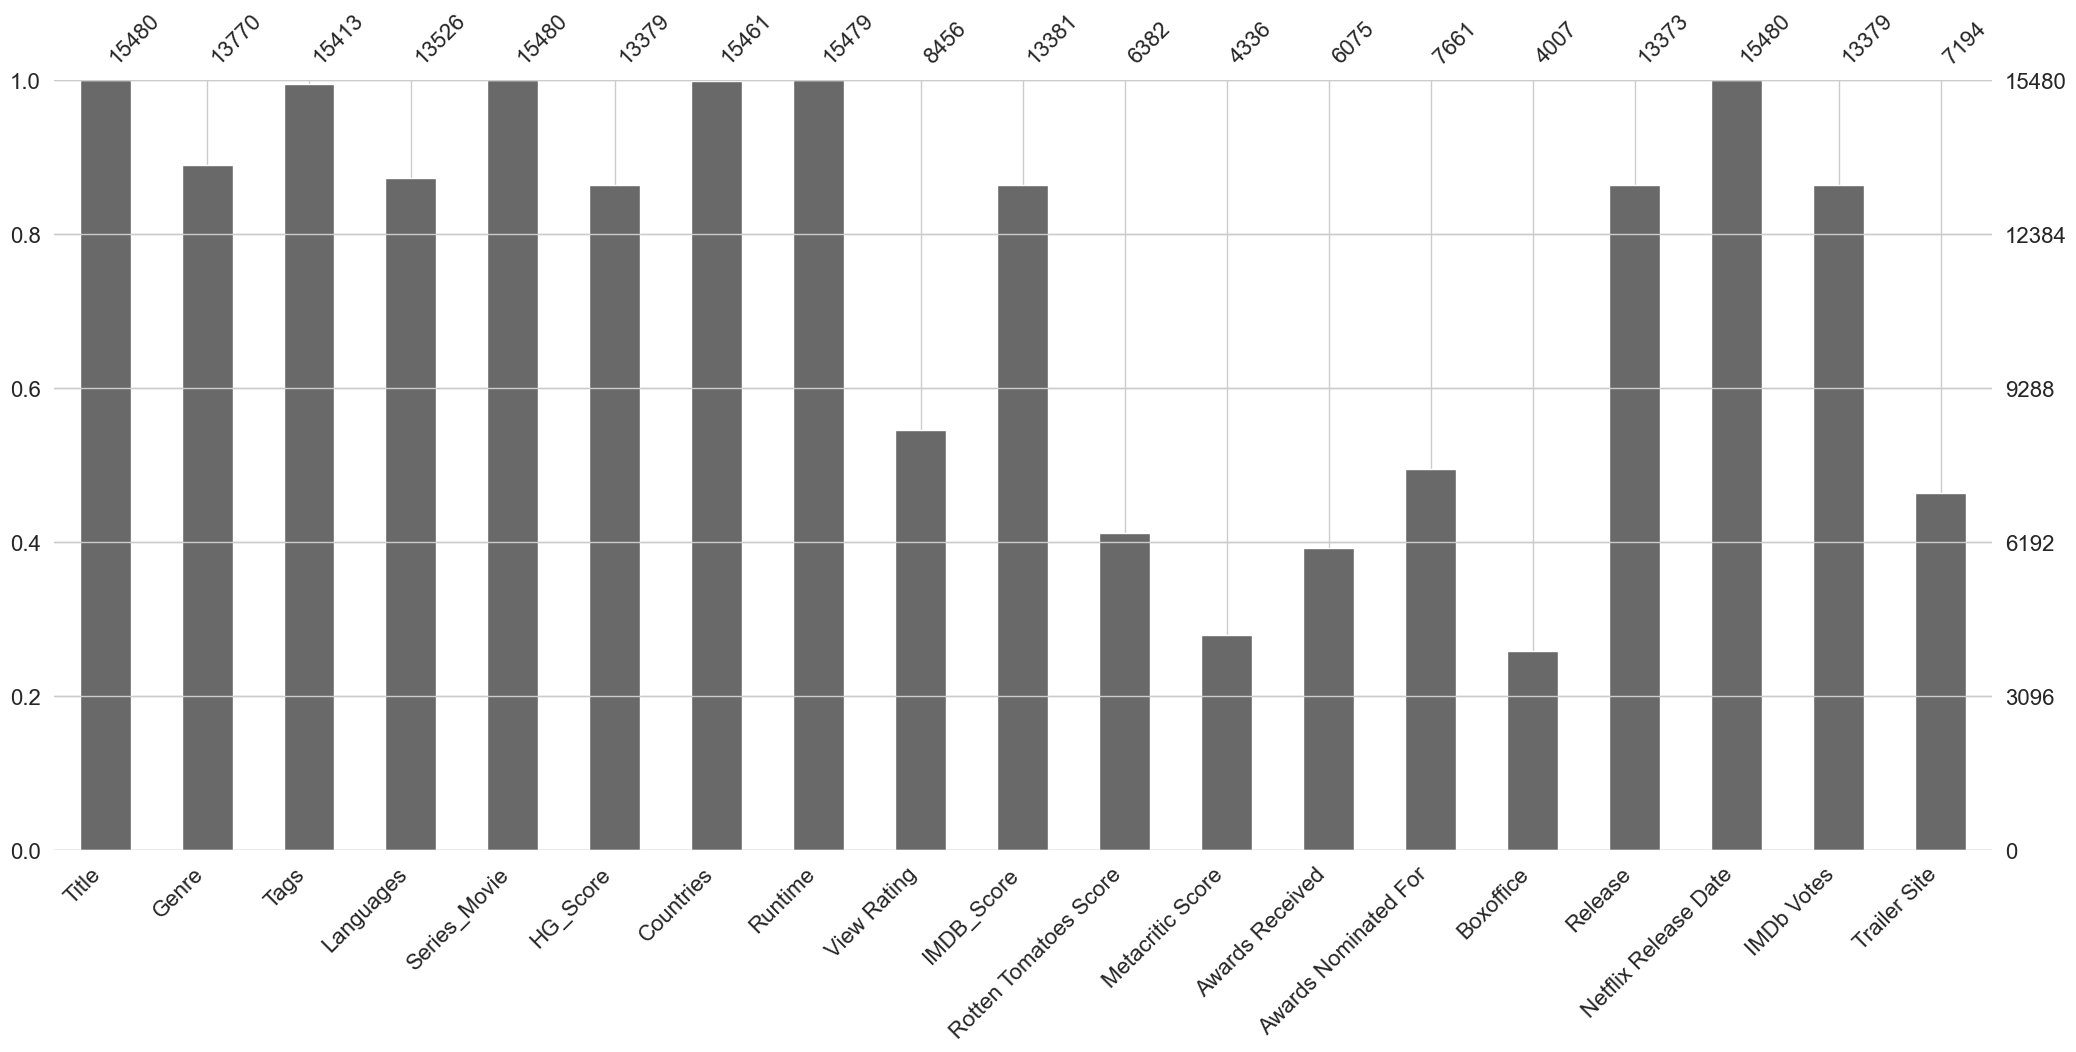

In [6]:

for col in df.columns:
    null_rate = round(df[col].isna().sum() / len(df) * 100, 2)
    if null_rate > 0:
        print(f"{col}: {null_rate}% missing")

msno.bar(df)
plt.show()



Quite a few columns have a lot of missing values, especially the critic scores (RT and Metacritic).  
Some seem to be missing across multiple columns for the same rows, which might mean some titles just have very little metadata online.


## Step 6 — Drop Rows Missing Key Values

In [9]:

df.dropna(subset=['IMDB_Score', 'Release'], inplace=True)
df.fillna({'Award_Nom': 0, 'Award_Rec': 0}, inplace=True)
df.fillna({'Genre': '-', 'Languages': '-', 'Tags': '-'}, inplace=True)
df.dropna(subset=['HG_Score', 'Countries', 'Runtime', 'IMDb Votes'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13044 entries, 0 to 15473
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  13044 non-null  object 
 1   Genre                  13044 non-null  object 
 2   Tags                   13044 non-null  object 
 3   Languages              13044 non-null  object 
 4   Series_Movie           13044 non-null  object 
 5   HG_Score               13044 non-null  float64
 6   Countries              13044 non-null  object 
 7   Runtime                13044 non-null  object 
 8   View Rating            8326 non-null   object 
 9   IMDB_Score             13044 non-null  float64
 10  Rotten Tomatoes Score  6342 non-null   float64
 11  Metacritic Score       4330 non-null   float64
 12  Awards Received        5994 non-null   float64
 13  Awards Nominated For   7564 non-null   float64
 14  Boxoffice              4000 non-null   object 
 15  Release

## Step 7 — Basic Data Type Fixes

In [10]:

df['Release'] = pd.to_datetime(df['Release'], errors='coerce')
if 'NF_Release' in df.columns:
    df['NF_Release'] = pd.to_datetime(df['NF_Release'], errors='coerce')

df[['Series_Movie', 'Runtime']] = df[['Series_Movie', 'Runtime']].astype('category', errors='ignore')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13044 entries, 0 to 15473
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  13044 non-null  object        
 1   Genre                  13044 non-null  object        
 2   Tags                   13044 non-null  object        
 3   Languages              13044 non-null  object        
 4   Series_Movie           13044 non-null  category      
 5   HG_Score               13044 non-null  float64       
 6   Countries              13044 non-null  object        
 7   Runtime                13044 non-null  category      
 8   View Rating            8326 non-null   object        
 9   IMDB_Score             13044 non-null  float64       
 10  Rotten Tomatoes Score  6342 non-null   float64       
 11  Metacritic Score       4330 non-null   float64       
 12  Awards Received        5994 non-null   float64       
 13  Awards

## Step 8 — Quick Numeric Overview

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
HG_Score,13044.0,5.889988,0.6,3.8,6.7,7.9,9.8,2.250181
IMDB_Score,13044.0,6.489689,1.0,5.8,6.6,7.3,9.7,1.144277
Rotten Tomatoes Score,6342.0,59.495585,0.0,38.0,64.0,83.0,100.0,26.989959
Metacritic Score,4330.0,56.803233,5.0,44.0,57.0,70.0,100.0,17.57964
Awards Received,5994.0,8.821822,1.0,1.0,3.0,8.0,300.0,18.360117
Awards Nominated For,7564.0,14.099418,1.0,2.0,5.0,13.0,386.0,29.974305
Release,13044,2011-08-23 13:50:23.735050496,1910-04-25 00:00:00,2009-04-09 00:00:00,2015-08-07 00:00:00,2018-04-20 00:00:00,2021-11-12 00:00:00,NaN
IMDb Votes,13044.0,43670.978151,5.0,443.0,2499.5,22457.75,2354197.0,126785.70662


## Step 9 — Correlation Check

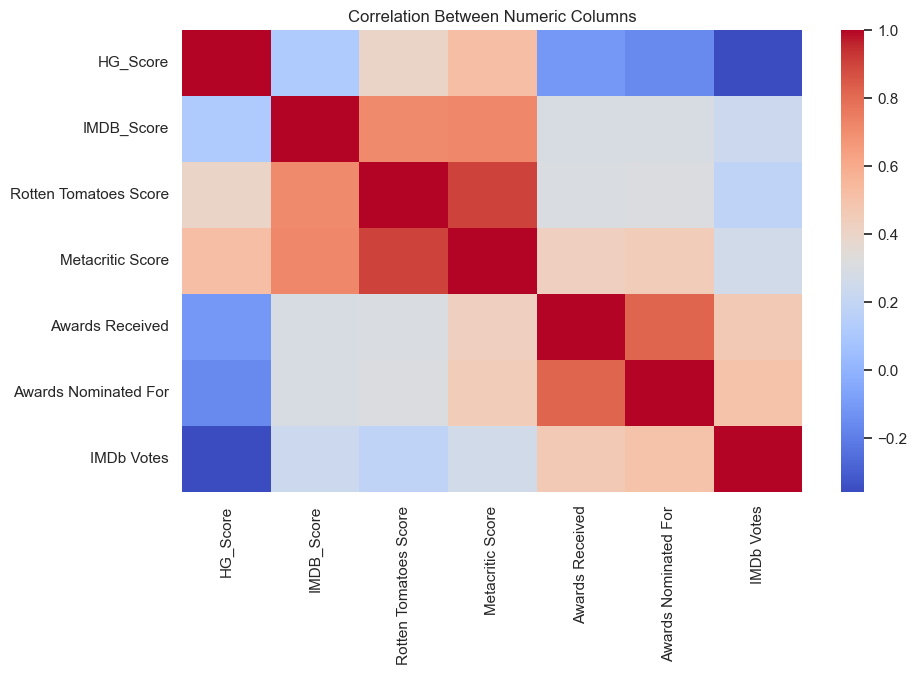

In [12]:

num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Between Numeric Columns")
plt.show()



As expected, IMDb votes and scores are positively related. Award counts also go up with IMDb scores, while the “Hidden Gem” score tends to drop for very popular shows.


## Step 10 — Genre Exploration

C:\Users\kings\AppData\Local\Temp\ipykernel_13896\3835757750.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Genre', x='Count', data=genre_df, palette='crest')


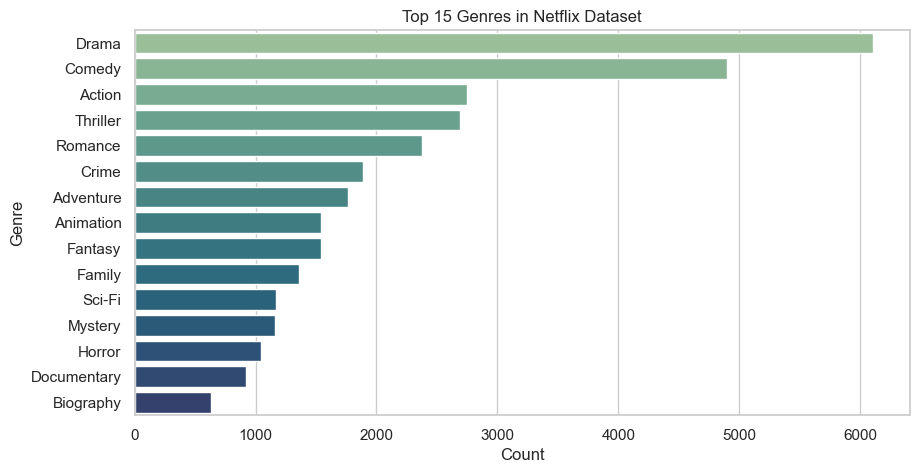

In [13]:

from collections import Counter

genres = Counter()
for g in df['Genre'].dropna():
    for item in [x.strip() for x in str(g).split(',')]:
        genres[item] += 1

genre_df = pd.DataFrame(genres.most_common(15), columns=['Genre', 'Count'])
plt.figure(figsize=(10,5))
sns.barplot(y='Genre', x='Count', data=genre_df, palette='crest')
plt.title("Top 15 Genres in Netflix Dataset")
plt.show()



Drama and Comedy dominate, which fits expectations for Netflix content. Many titles also have multiple overlapping genres.


## Step 11 — Scores by Type (Movie vs Series)

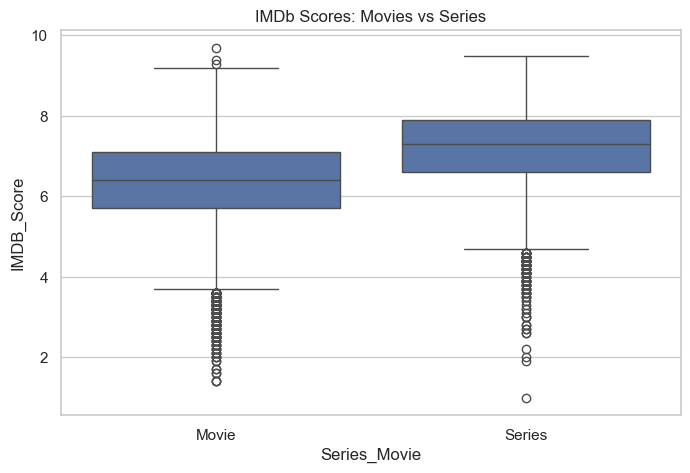

In [14]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Series_Movie', y='IMDB_Score', data=df)
plt.title("IMDb Scores: Movies vs Series")
plt.show()



Movies seem to have a wider range of IMDb scores, while series tend to cluster a bit tighter around mid-to-high ratings.


## Step 12 — Hidden Gem vs Popularity

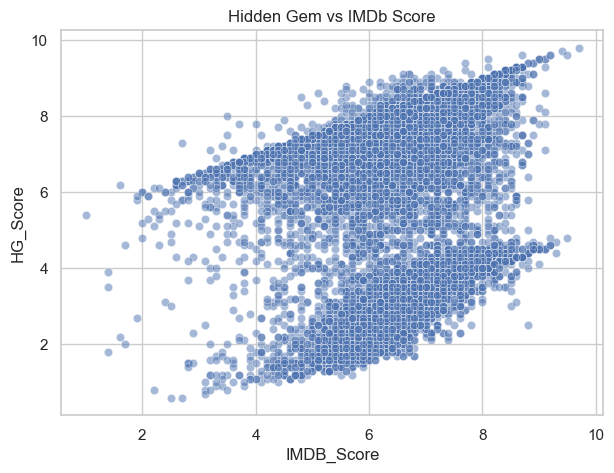

In [15]:

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='IMDB_Score', y='HG_Score', alpha=0.5)
plt.title("Hidden Gem vs IMDb Score")
plt.show()



Higher IMDb scores don’t necessarily mean higher “Hidden Gem” scores — if anything, the opposite. 
This makes sense since the Hidden Gem metric is supposed to highlight lesser-known but well-liked titles.



## Step 13 — Wrap-Up Thoughts

This was a basic first EDA project to get comfortable working with a real-world dataset.  
A few key takeaways:

- The data is messy, especially for critic scores.
- IMDb data is the most complete and reliable metric here.
- Genre and popularity patterns make intuitive sense.
- A next step could be to explore release year trends or audience vs critic score gaps.

Nothing too deep — but solid practice in cleaning, inspecting, and visualising data from scratch!
